# MRI Image Analysis in Python

Last updated: 2020-12-16

## Working with MRI Data

### Background

> This assignment is based on the DataCamp lesson, Biomedical Image Analysis in Python. To complete this assignment, you can rely on chapters 1 and 2 from that lesson. I suggest that you download the slides from those chapters and refer to them as you work through this lesson.

---PSYO/NESC 3505 Assignment 5 cell 1

### Read file and check it

In [1]:
import imageio
import scipy.ndimage as ndi
import scipy.stats
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
brain_img = imageio.imread('Anat001.20040930.142737.2.MPRAGE_T1_SAGITTAL.0080.dcm')

Unlike typically image file, DICOM file has metadata. Metadata can help you get idea about ‘modality‘ (modality refers to the type of imaging, such as CT, PET, MRI, EEG, MEG, etc), slice, date and patient details etc. 

In [3]:
brain_img.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.4'),
      ('SOPInstanceUID', '1.3.12.2.1107.5.2.13.20590.4.0.3354588020772092'),
      ('StudyDate', '20040930'),
      ('SeriesDate', '20040930'),
      ('AcquisitionDate', '20040930'),
      ('ContentDate', '20040930'),
      ('StudyTime', '142047.390000 '),
      ('SeriesTime', '142737.546000 '),
      ('AcquisitionTime', '142142.387518 '),
      ('ContentTime', '142805.234000 '),
      ('Modality', 'MR'),
      ('Manufacturer', 'SIEMENS'),
      ('InstitutionName', 'UNIVERSITY OF ROCHESTER'),
      ('StudyDescription', 'ACHTMAN^FMRI'),
      ('SeriesDescription', 'MPRAGE T1 SAGITTAL'),
      ('PatientName', 'Anat001'),
      ('PatientID', '04.09.30-14:20:32-DST-1.3.12.2.1107.5.2.13.20590'),
      ('PatientBirthDate', '19730905'),
      ('PatientSex', 'M '),
      ('PatientAge', '031Y'),
      ('PatientWeight', 77.18),
      ('StudyInstanceUID', '1.3.12.2.1107.5.2.13.20590.4.0.335278903

In [4]:
brain_img.meta['Modality']

'MR'

we know the image from MRI 

After that, we can display the image 

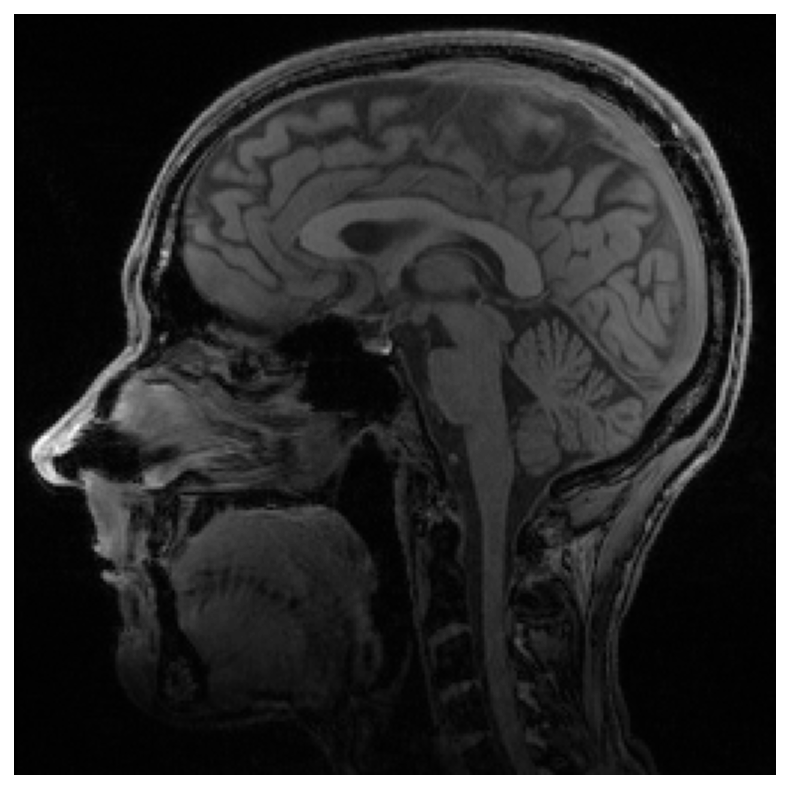

In [5]:
plt.imshow(brain_img,cmap='gray')
plt.axis('off')
plt.show()

### Data cleaning

> In structural/anatomical MRI brain images, the contrast is difference in intensities, that allows you to distinguish white matter from grey matter from the cerebralspinal fluid (CSF) around the brain and in the ventricles. The primary source of contrast in MRI is between fat and water. The MRI image you are working with has what is called T1 weighting, in which water appears dark and fat appears bright. Since CSF is mostly water, it appears black, and white matter is brightest, because it is primarily composed of axons connecting different brain areas. The myelin sheath around the axons is primarily fat. Grey matter (the outer surface of the cortex, and some inner areas like the basal ganglia) has intensity values between CSF and white matter, because the tissue is more dense than CSF, but less fatty than white matter.

>Because different tissues have different intensities, a histogram of the image can help us identify the intensity ranges of different tissue types.

---PSYO/NESC 3505 Assignment 5 cell 27

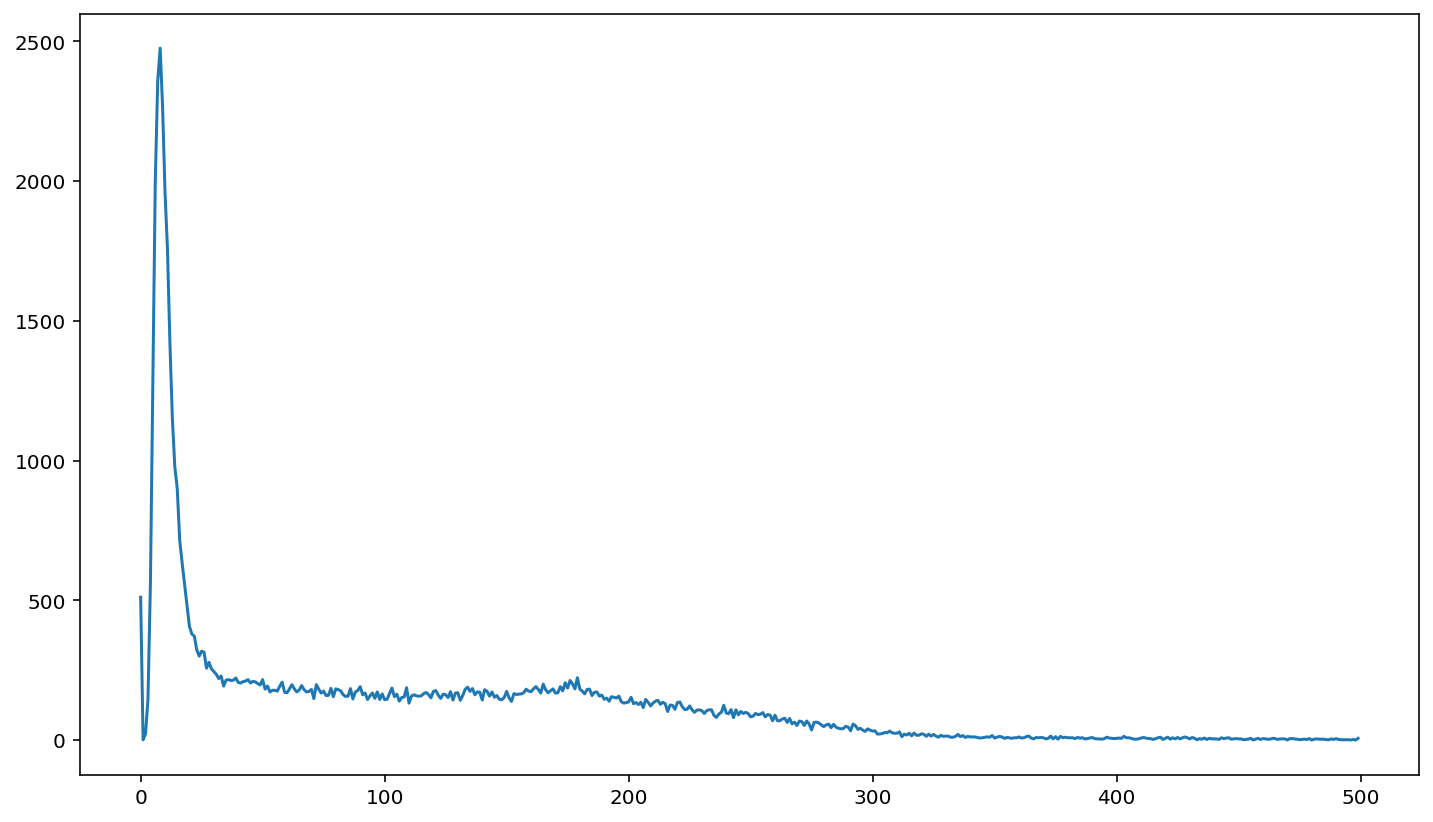

In [6]:
hist = ndi.histogram(brain_img,min=0,max=500,bins=500)
plt.plot(hist)
plt.show()

> The histogram above shows a large peak close to zero. This means there are a large number of voxels in teh image with values close to zero. This is because much of the 3D image volume is outside of the brain (the black background area), and as well there are dark areas inside the brain, where CSF is. There is a second peak between intensity values of approximately 150-200. This peak represents the "brain" voxels. Grey and white matter have pretty similar intensities in this image, so we don't see distinct peaks in the histogram for each of these, but the histogram tells us that "brain" voxels generally have intensities between 150-200.

---PSYO/NESC 3505 Assignment 5 cell 29

Like Datacamp course mentioned, we can apply mask method to compute and plot a histogram only of voxels inside the brain mask.

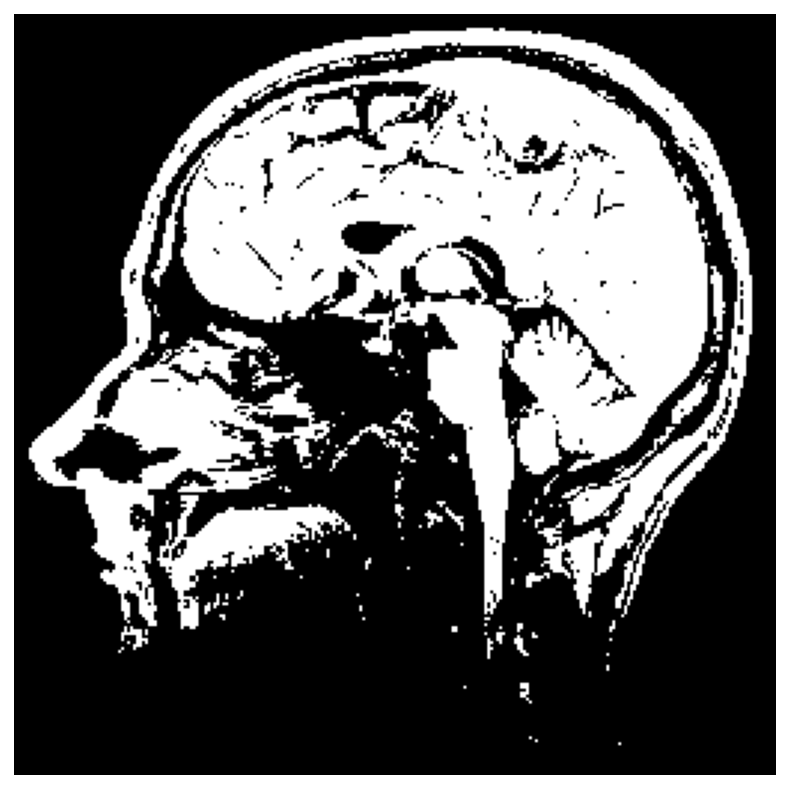

In [7]:
brain_mask = np.where(brain_img > 125,1,0)
plt.imshow(brain_mask,cmap='gray')
plt.axis('off')
plt.show()

In here we define the threshold is 125 above 125 equal to 1, and values below the threshold equal to 0

We can plot histogram again, this time we care about mask image. therefore, voxels not in the brain mask should take value of np.nan(). not display in the histogram. 

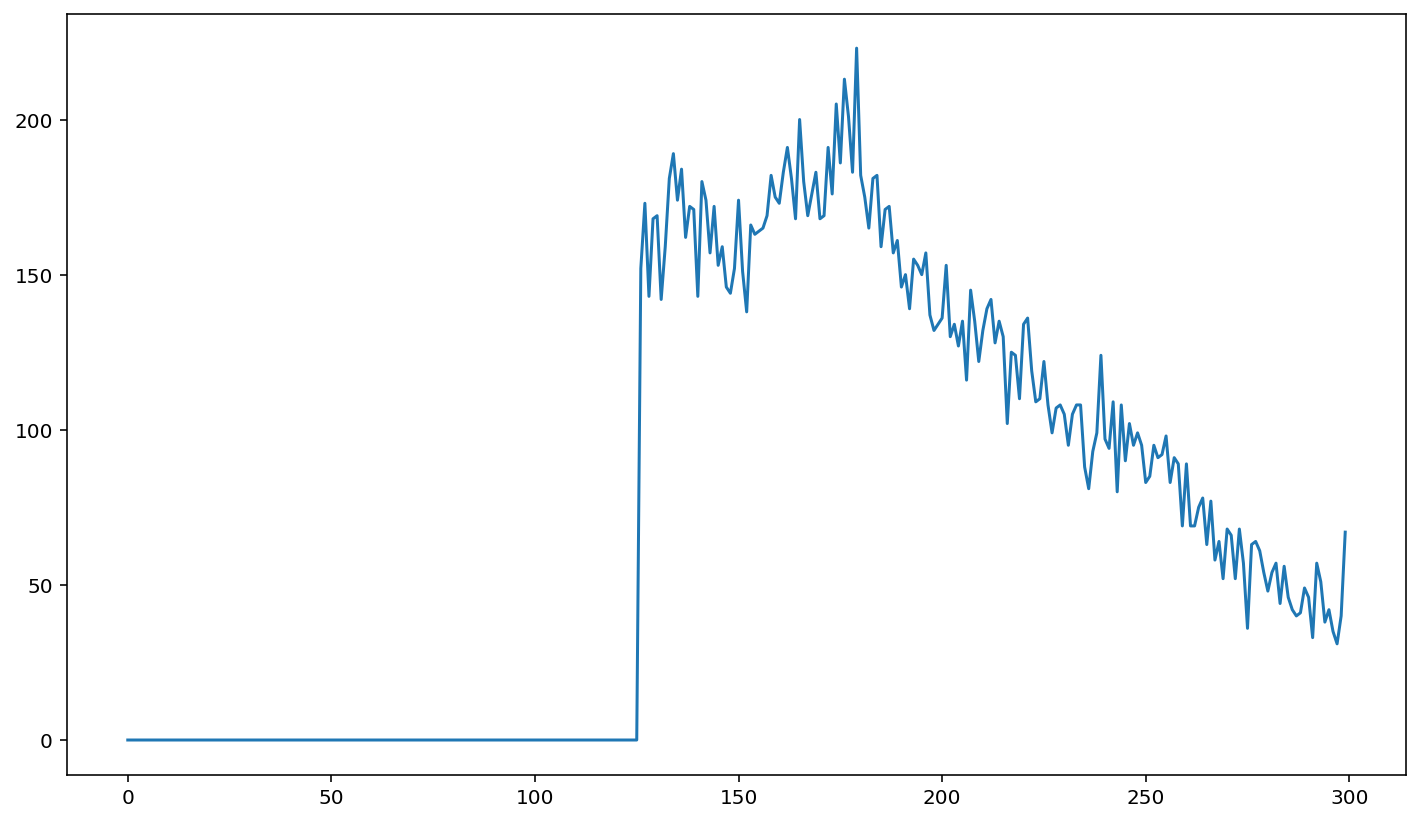

In [8]:
masked_image = np.where(brain_mask ==1, brain_img,np.nan)
hist = ndi.histogram(masked_image,min=0,max=300,bins=300)
plt.plot(hist)
plt.show()

The image look like:

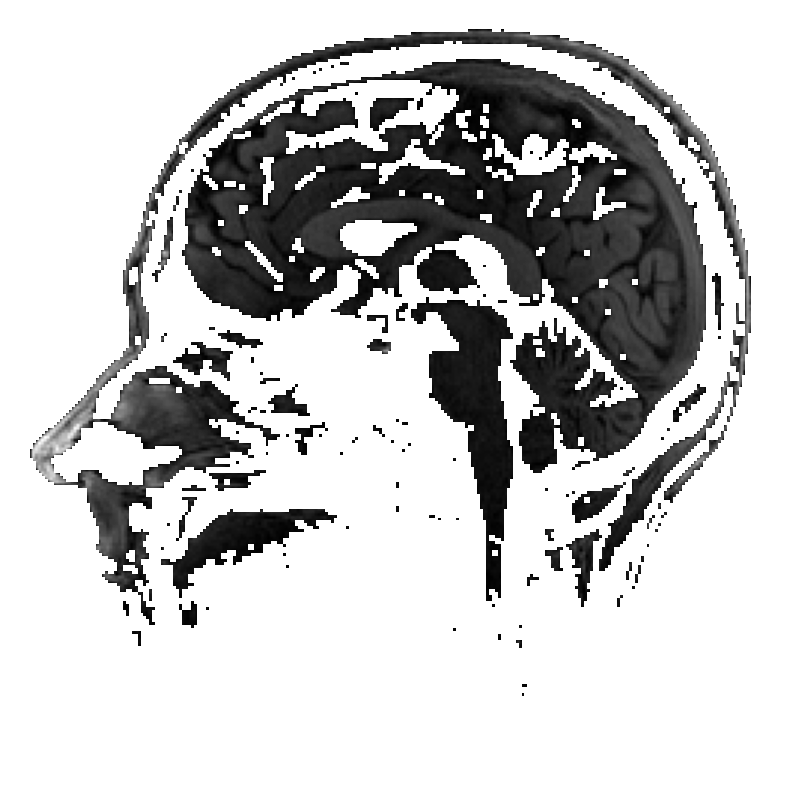

In [9]:
masked_image = np.where(brain_mask ==1, brain_img,np.nan)
plt.imshow(masked_image,cmap='gray')
plt.axis('off')
plt.show()

### Visualization

> Now we're going to load in a 3D volume, i.e., a whole series of slices that cover the entire brain. This is stored in a set of 160 DICOM files, each a slice through the brain.

---PSYO/NESC 3505 Assignment 5 cell 13

Same steps above, we load the files and check it 

In [10]:
vol = imageio.volread('5.T1_GRE_3D_AXIAL')

Reading DICOM (examining files): 

1/161 files (0.6%)

  DICOM file has no SamplesPerPixel (perhaps this is a report?)
Reading DICOM (examining files): 1/161 files (0.6%)

109/161 files (67.7%)

  Warning: missing file after '/home/user/Assignment_5/5.T1_GRE_3D_AXIAL/Anat001.20040930.145131.5.T1_GRE_3D_AXIAL.0006.dcm'
Reading DICOM (examining files): 109/161 files (67.7%)

161/161 files (100.0%)

  Found 1 correct series.


Reading DICOM (loading data): 

159/159  (100.0%)

In [11]:
vol.shape

(159, 256, 192)

Also, we want to know the image spatial resolution. we are using voxels to describe the 3D image ‘pixels’ (volume pixels). Voxels data stored in the metadata property ‘sampling’ (note, they are in mm) 

In [12]:
vol.meta['sampling']

(1.0063291139240507, 1.0, 1.0)

Next, we use subplots methods to visualize a number of slices through the brain volume. 

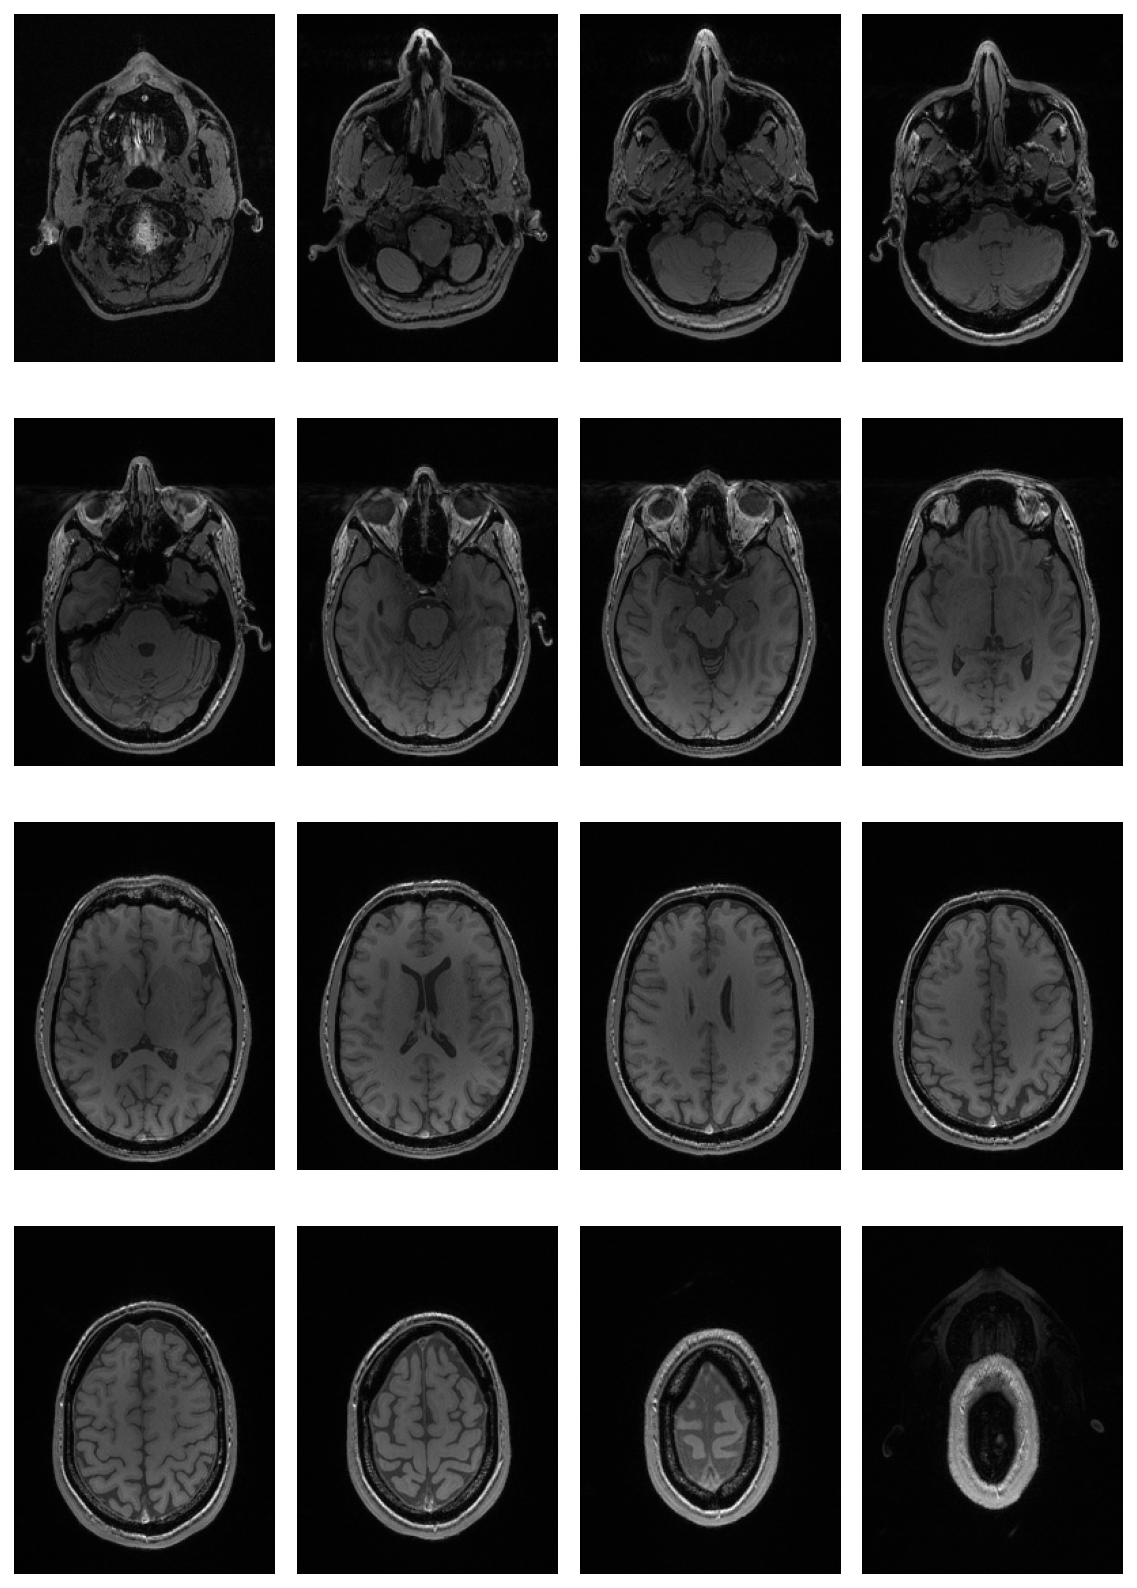

In [13]:
fig = plt.figure(figsize=[8, 12])
subplot_counter = 1

for i in range (0,159,10):
    ax = fig.add_subplot(4, 4, subplot_counter)
    plt.imshow(vol[i,:,:],cmap = 'gray') 
    plt.axis('off')
    
    plt.tight_layout()
    subplot_counter += 1
    
plt.show()

Here we have other way: [Plotly](https://sakurachaojun.github.io/PSYO3505/others/interact.html#interactive-app-with-plotly) can directly generate interactively, ‘real-time’ images.

> Another cool thing we can do with a 3D image is visualize a slice in some other dimension. That is, although the image was aquired as 160 slices in the axial plane, we can "reslice" the image to view the image from a different perspective. 

---PSYO/NESC 3505 Assignment 5 cell 23


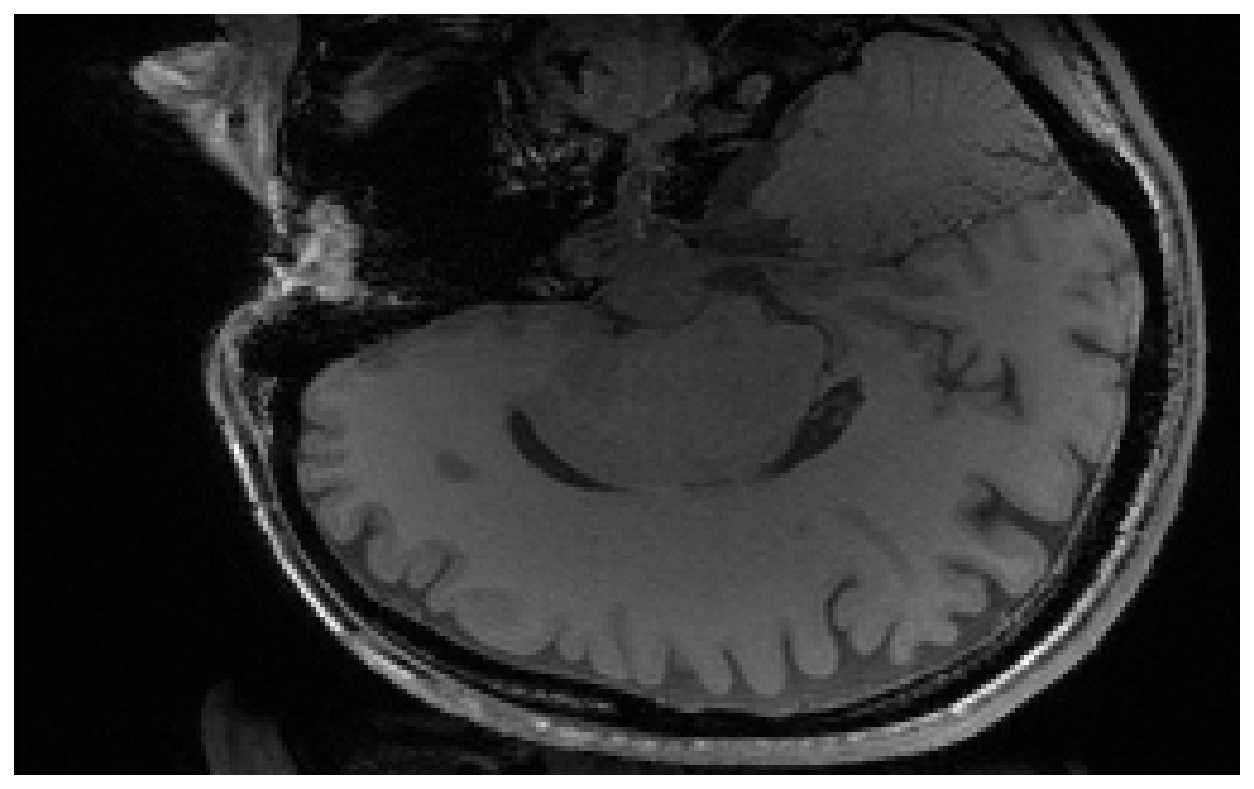

In [14]:
plt.imshow(vol[:,:,79],cmap = 'gray') 
plt.axis('off')
plt.show()

By using rorate methods, turn the image right side up for the plot

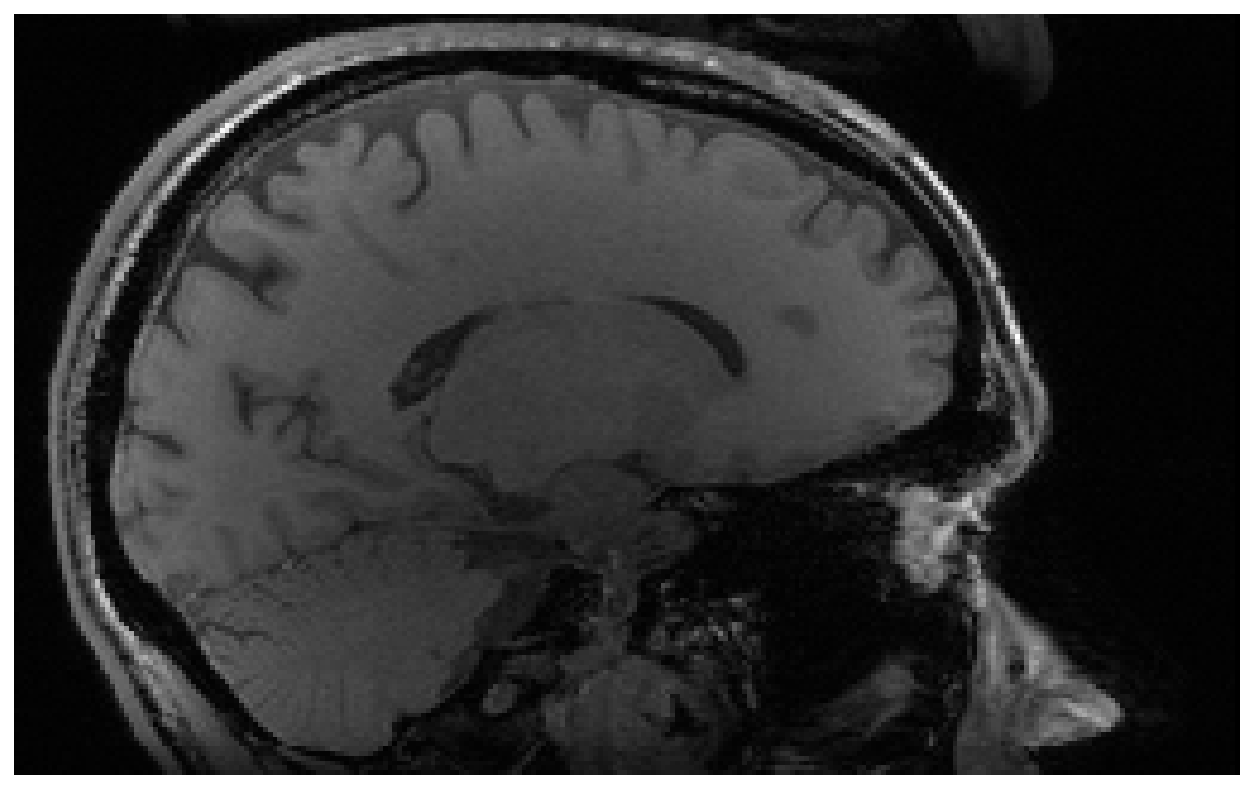

In [15]:
plt.imshow(ndi.rotate(vol[:,:,79],angle = 180,reshape = 'false'),cmap = 'gray') 
plt.axis('off')
plt.show()

<br>

## Working with fMRI Statistical Maps

### Background

> Now we'll see how we can apply these approaches to fMRI data. We're going to load in a statistical map, the results of an analysis of a single fMRI scan from an experiment. This experiment was designed to activate area V5 of the visual cortex, which is particularly sensitive to visual motion. During the scan, the stimuli alternated between moving and stationary dots every 15.4 s. During moving blocks, the participant had to press a button whenever the dot speed briefly increased; during the stationary blocks, the dots occasionally dimmed in brightness, and the participant had to press the button when they detected dimming.
<br>
<br>
To analyze the data, we correlated the time series at each voxel with a time series that represents the experimental design. The experimental design could be drawn as a square wave, like this example where "on" would be moving stimuli and "off" would be stationary stimuli:
<br>
<br>
The brain doesn't actually respond in an instant on-off fashion, but rather gradually ramping up and down again. Formally this is known as the hemodynamic response function, and we correlated our fMRI data with a variant of the square wave above that is more rounded. The details aren't important for now, however. What we are going to work with now is the output of such a correlation (also called regression) analysis.
<br>
<br>
The image that we load below is called a statistical parametric map. It's a 3D volume, like other MRI images we've worked with, but here the intensity value of each voxel is a statistical Z score representing the strength of that correlation (which you can also think of as the difference in fMRI signal between moving and stationary blocks), divided by its variance. Z scores are standardized, meaning that a particular Z value is always associated with a particular p value. For example, Z = 2.33 equates to a p = 0.01.
<br>
<br>
As a side note, these are in a different file format. The above images were in DICOM, but these are in NIfTI format. NIfTI stands for "neuroimaging informatics technology initiative", and was sponsored by the the National Institute of Mental Health and the National Institute of Neurological Disorders and Stroke with the aim of providing a standard file format that could be used across different software packages and labs working in neuroimaging research.
<br>
<br>
SciPy's imageio package does not read NIfTI files, so we need to import and use a different package, NiBabel, which was written specifically for reading a variety of neuroimaging data formats (in spite of NIfTI's being an effort to standardize file formats, there are still a number of other formats in fairly widespread use). We imported NiBabel at the top of this file as nib.


---PSYO/NESC 3505 Assignment 5 cell 34

### Read file and check it

In [16]:
fmri_zstat = nib.load('V5_loc1_zstat1.nii.gz')
type(fmri_zstat)

nibabel.nifti1.Nifti1Image

NIfTI image is its header, which contains metadata for the image

In [17]:
print(fmri_zstat.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 64 64 27  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : z score
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.   3.75 3.75 4.   1.   0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 8.046828
cal_min         : -5.9577875
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL5.0'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -121.725
qoffset_y       : -87.425
qoffset_z       : -52.0
srow_x       

> Since the image is a "map" of the Z scores, it's commonly called a Z map. Importantly, because the Z scores represent the correlations over the whole time series, we no longer have a 4D image, but just a 3D one:

---PSYO/NESC 3505 Assignment 5 cell 41

In [18]:
fmri_zstat.shape

(64, 64, 27)

Because we cannot access the data directly due to this file special format, we need applying  .get_fdata() method to access it. 

In [19]:
fmri_zstat_data = fmri_zstat.get_fdata()
type(fmri_zstat_data)

numpy.ndarray

> We can get a sense of the range of values in the data by finding the min and max values. The image contains positive Z scores, which represent stronger activation in the moving than stationary condition, as well as negative values, which represent stronger activation in the stationary condition. The latter are not of particular interest to us, but such "deactivations" commonly occur in just about every fMRI study.

---PSYO/NESC 3505 Assignment 5 cell 45

In [20]:
print('Max z value = ' + str(fmri_zstat_data.max().round(2)))
print('Min z value = ' + str(fmri_zstat_data.min().round(2)))

Max z value = 8.05
Min z value = -5.96


### Visualization

due the fMRI data is lower resolution, we have only 27 slices

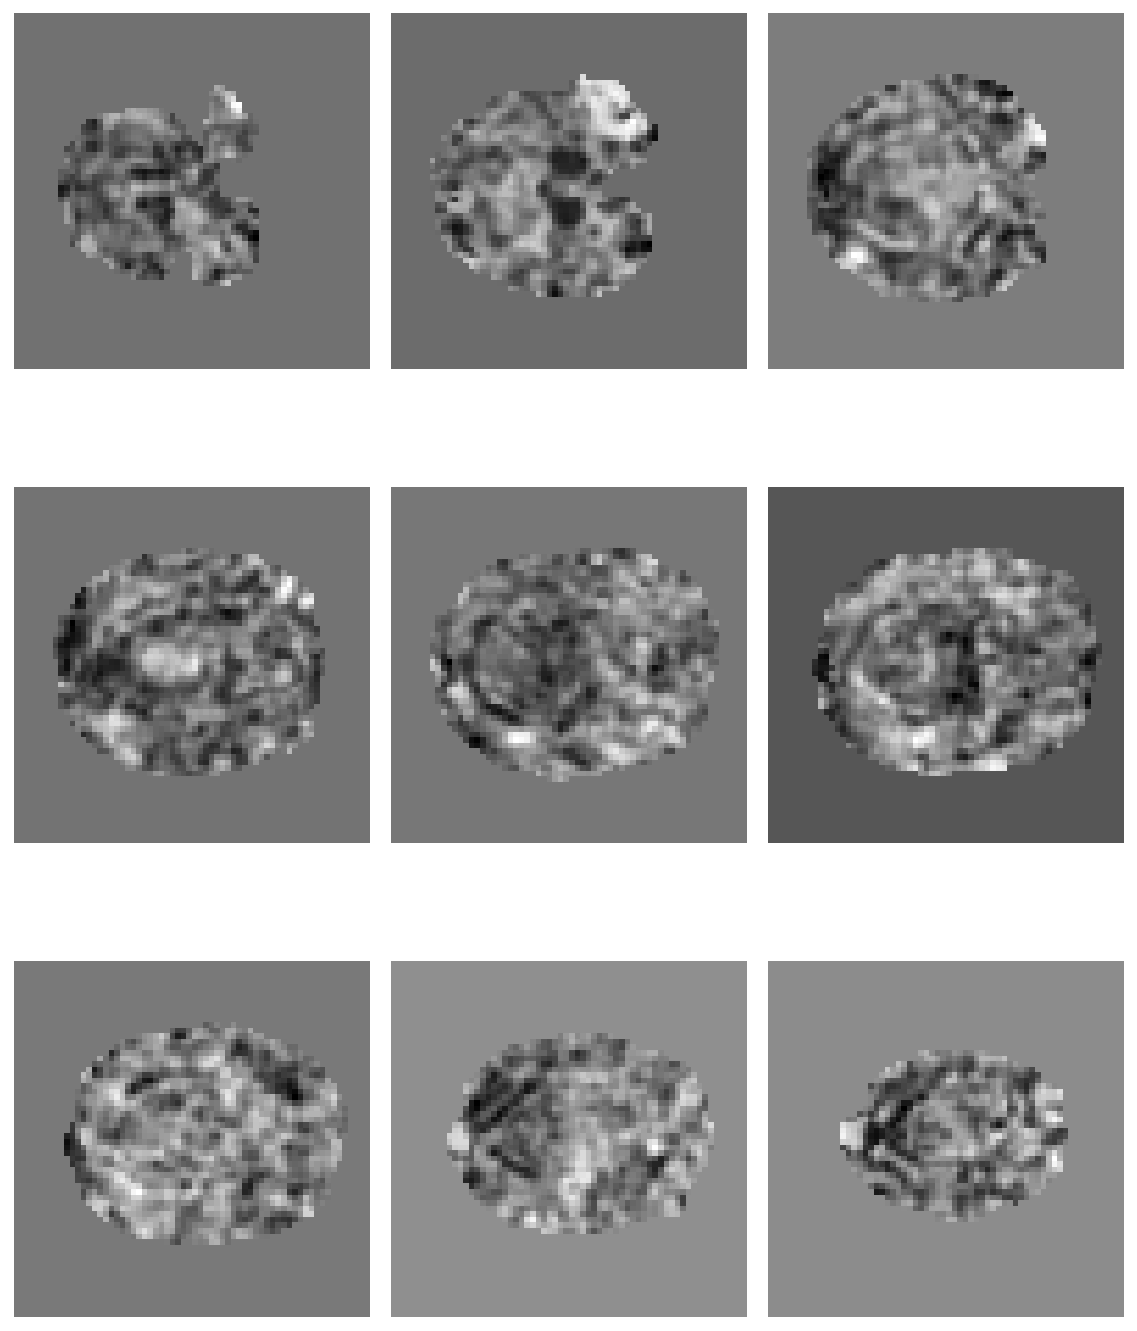

In [21]:
fig = plt.figure(figsize=[8, 12])
subplot_counter = 1

for i in range (0,26,3):
    ax = fig.add_subplot(3, 3, subplot_counter)
    plt.imshow(fmri_zstat_data[:,:,i],cmap = 'gray') 
    plt.axis('off')
    
    plt.tight_layout()
    subplot_counter += 1
    
plt.show()

> This is a case where a different colour map can help with visualization. Since the data have positive and negative values, with 0 meaning "no activation difference between conditions", it makes sense to use a colour map that has different colours for positive and negative, and no colour close to zero. The seismic colour map in Matplotlib is designed for exactly this purpose.
<br>
<br>
We also provide the arguments vmin and vmax to the plot command, to set the upper and lower ranges that the colours map to. This is important to ensure that all of the panels are scaled the same; you'll notice above that when we don't do this, the background (non-brain areas) intensity varies in each plot, suggesting that something is not right about how we're plotting the data.
<br>
<br>

---PSYO/NESC 3505 Assignment 5 cell 50

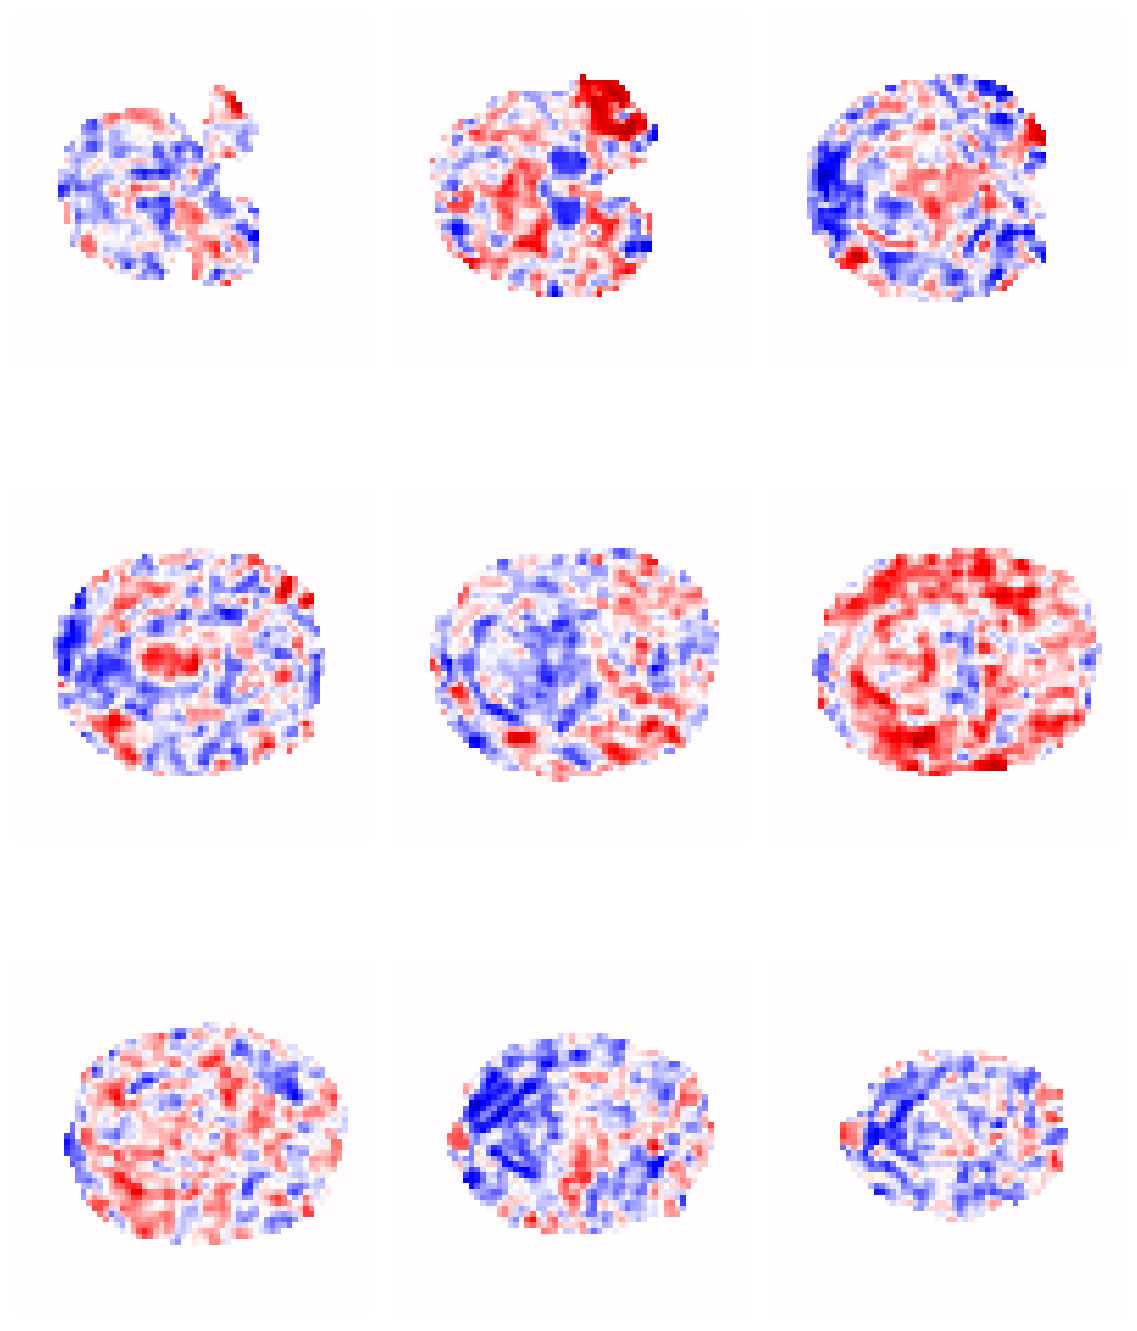

In [22]:
fig = plt.figure(figsize=[8, 12])
subplot_counter = 1

for i in range (0,26,3):
    ax = fig.add_subplot(3, 3, subplot_counter)
    plt.imshow(fmri_zstat_data[:,:,i],cmap = 'seismic',vmin= -8,vmax=8) 
    plt.axis('off')
    
    plt.tight_layout()
    subplot_counter += 1
    
plt.show()

### Thresholding the statistical image

> Since our objective is to identify V5 and any other brain area that responds more strongly to moving than stationary stimuli, we will next threshold the image to only show the Z scores above our statistical threshold.
<br>
<br>
scipy.stats provides a convenient function to determine the Z value corresponding to any p value. Note that we need to use the inverse of our desired p threshold (1 - p):

---PSYO/NESC 3505 Assignment 5 cell 51

In [23]:
z_thresh = scipy.stats.norm.ppf(1 - .0001)
print(z_thresh)

3.719016485455709


Plot the image thresholded to show only voxels with values above zthresh

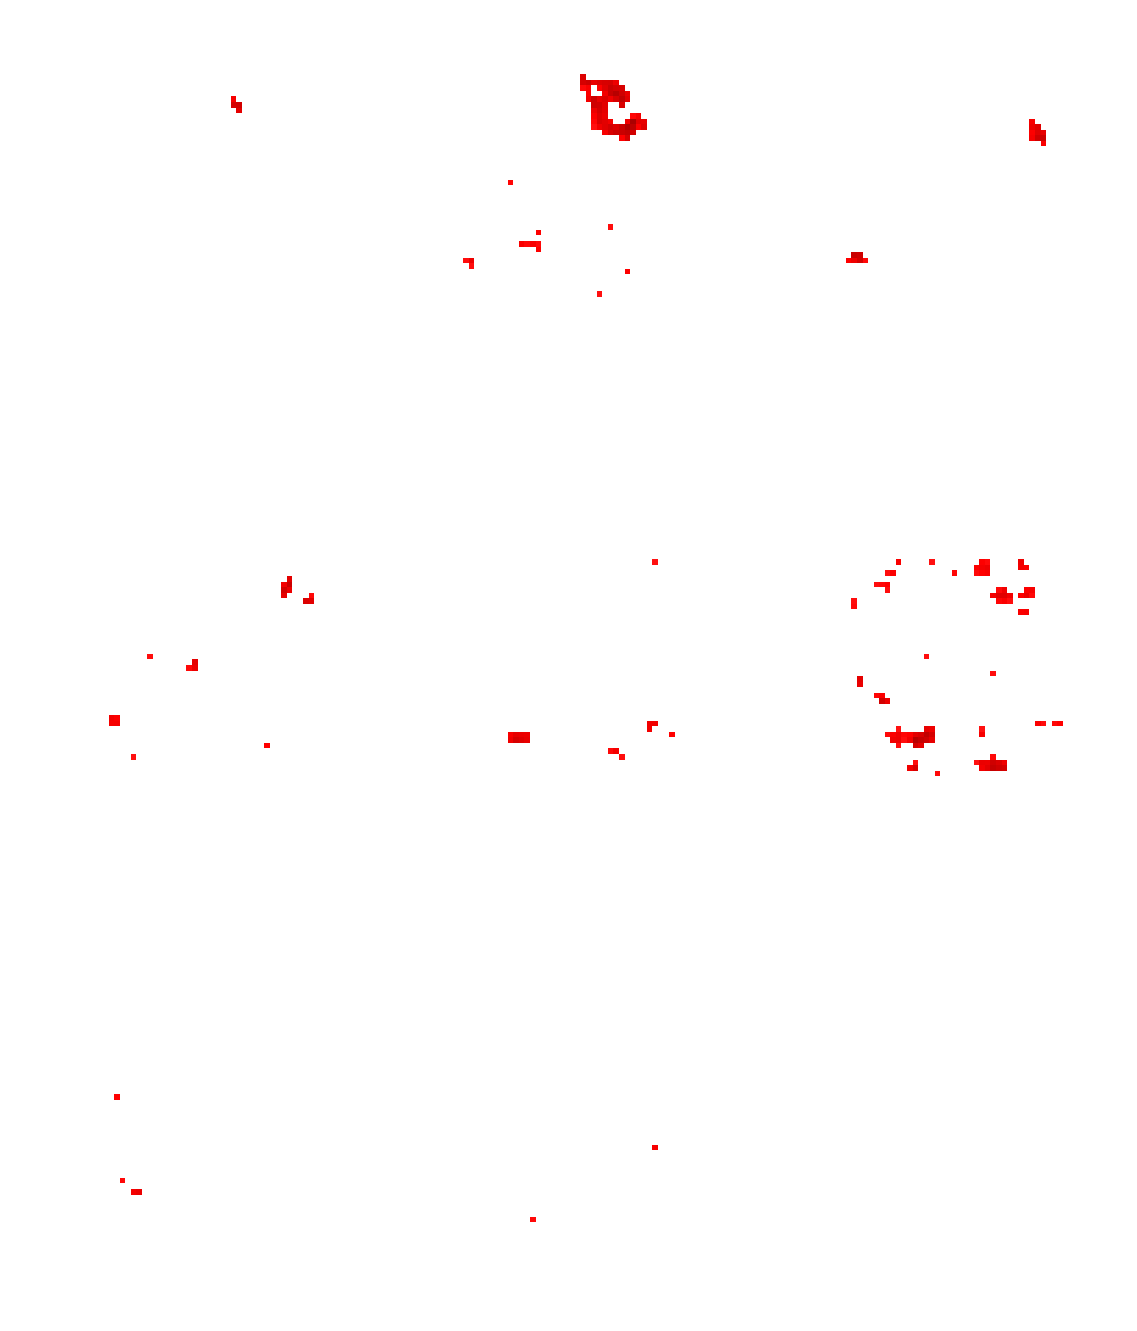

In [24]:
fig = plt.figure(figsize=[8, 12])
subplot_counter = 1
thresh_zstat = np.where(fmri_zstat_data>z_thresh,fmri_zstat_data,np.nan)

for i in range (0,26,3):
    ax = fig.add_subplot(3, 3, subplot_counter)
    plt.imshow(thresh_zstat[:,:,i],cmap = 'seismic',vmin= -8,vmax=8) 
    plt.axis('off')
    
    plt.tight_layout()
    subplot_counter += 1
    
plt.show()

> Of course, those "blobs" don't tell us much without being able to visualize them relative to the brain anatomy. To do this, we can overlay the thresholded Z map on a greyscale brain image. The easiest one to use is a "raw" fMRI image from the same scan, because this has the same resolution and orientation as our statistical map. There are ways to use a higher-quality anatomical scan, but we won't add that compelxity to our code here.

---PSYO/NESC 3505 Assignment 5 cell 55

Reload the image

In [25]:
func = nib.load('V5_loc1_example_func.nii.gz')
underlay = func.get_fdata()

And put all together

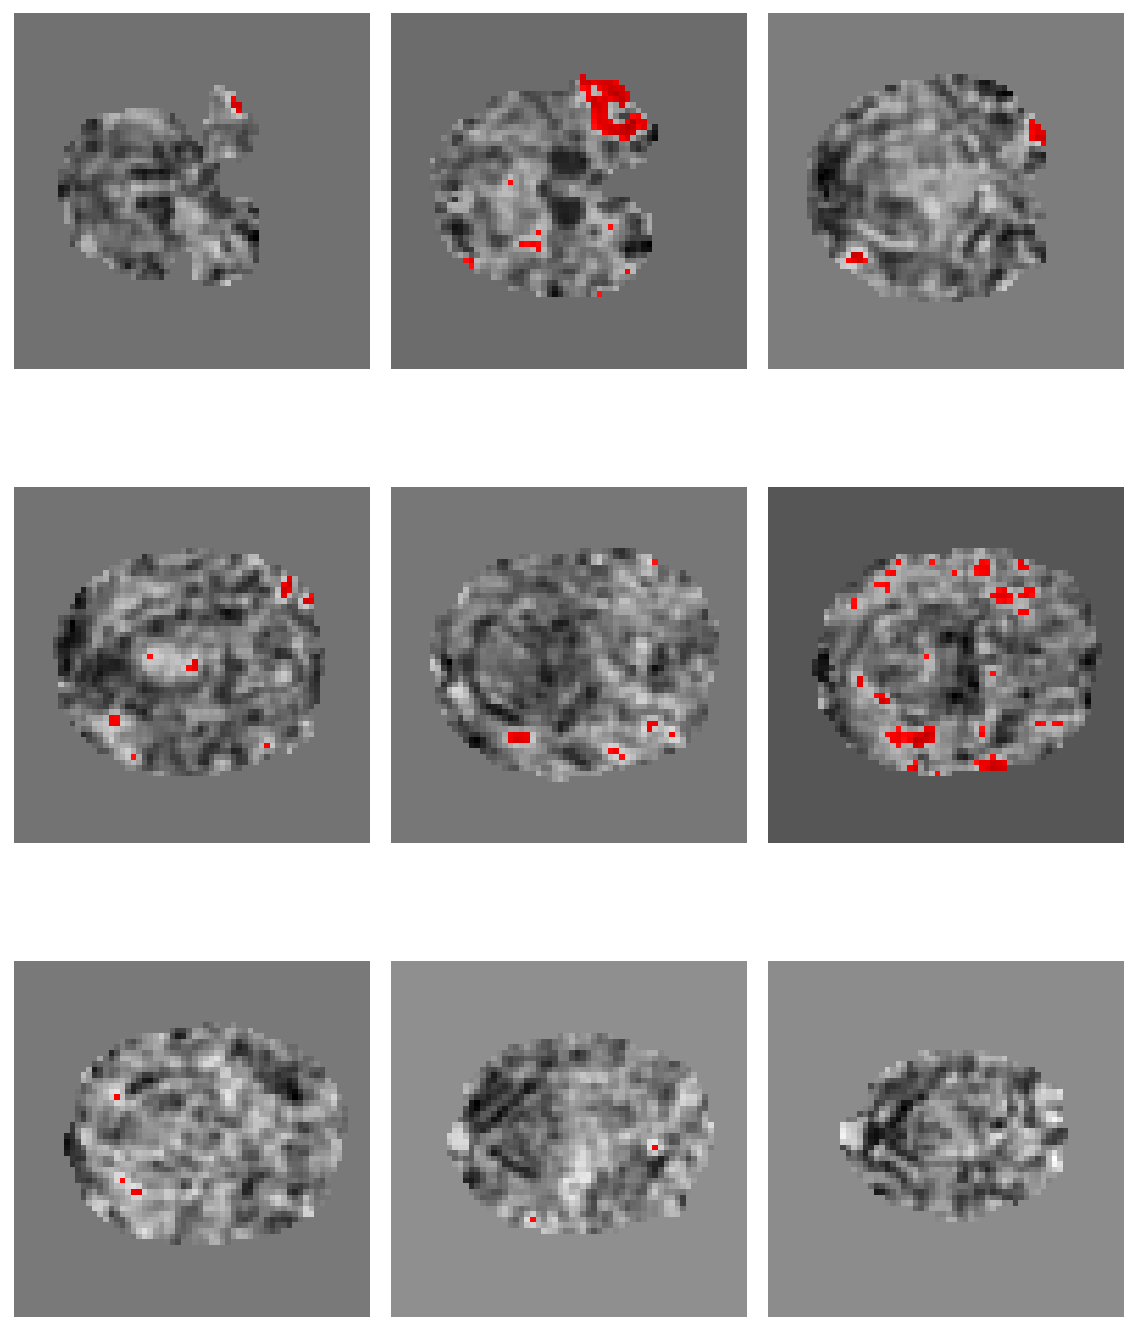

In [26]:
fig = plt.figure(figsize=[8, 12])
subplot_counter = 1
thresh_zstat = np.where(fmri_zstat_data>z_thresh,fmri_zstat_data,np.nan)

for i in range (0,26,3):
    ax = fig.add_subplot(3, 3, subplot_counter)
    plt.imshow(fmri_zstat_data[:,:,i],cmap = 'gray') 
    plt.imshow(thresh_zstat[:,:,i],cmap = 'seismic',vmin= -8,vmax=8) 
    plt.axis('off')
    
    plt.tight_layout()
    subplot_counter += 1
    
plt.show()

### Interpretation

>For reference, the 6th slice (2nd row, 3rd column) shows area V5 in each hemisphere. Due to the way the images are oriented, these are the blobs of red nearer to the back of the head (left side of image) in each hemisphere. There are other areas of significant activation as well; some of these may be real, since other brain areas might be engaged by this task (e.g., attention, or related to pressing different buttons in the two conditions). However, some of that is likely noise as well. In a typical experiment, we would do several fMRI scans to obtain a more robust estimate of activation in each individual, and we would also include many individuals in the study to determine the average response across people.

---PSYO/NESC 3505 Assignment 5 cell 59

So far, we end MRI Image Analysis in Python

## References

[1] [NESC 3505 Neural Data Science, at Dalhousie University. Textbook](https://dalpsychneuro.github.io/NESC_3505_textbook/intro.html)
<br>
[2] NESC 3505 Neural Data Science, at Dalhousie University. Assignment 5
<br>
[3] ['Biomedical Image Analysis in Python'.an INTERACTIVE COURSE](https://learn.datacamp.com/courses/biomedical-image-analysis-in-python)

Based on assignment 5 and DataCamp 'Biomedical Image Analysis in Python'.an INTERACTIVE COURSE (Stephen Bailey) <br>
<font color = red >This Demo and the attached files from course PSYO/NESC 3505 Neural Data Science, at Dalhousie University. You should not disseminate, distribute or copy. </font>
<br>
<font color = red >This Demo using some knowledge and skills from Datacamp 'Biomedical Image Analysis in Python'.an INTERACTIVE COURSE (Stephen Bailey)
<br>I am NOT post inappropriate or copyrighted content, advertise or promote outside products or organizations </font>
<br>© Copyright 2020.PSYO/NESC 3505 FAll 2020 https://dalpsychneuro.github.io/NESC_3505_textbook/intro.html
<br>© Copyright 'Biomedical Image Analysis in Python'.an INTERACTIVE COURSE (Stephen Bailey) https://learn.datacamp.com/courses/biomedical-image-analysis-in-python
<br>
**For demonstration purposes only**